In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\saad\Downloads\spam.csv' ,encoding='latin1')
df

C:\Users\saad\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## DATA CLEANING

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.rename(columns={'v1' : 'target' , 'v2' : 'Text'} , inplace=True )

In [9]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
encode.fit(df.target)
df.target = encode.transform(df.target)
df

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.columns.tolist()

['target', 'Text']

# EXPLORATORY DATA ANALYSIS

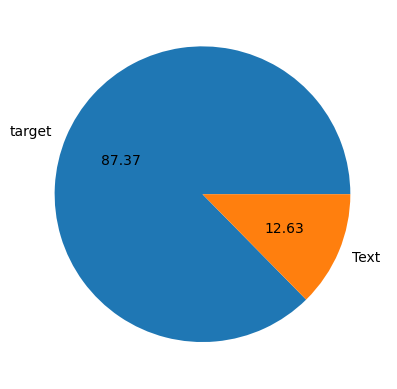

In [12]:
plot = plt.pie(df['target'].value_counts() , labels=df.columns , autopct='%0.2f'  )


In [13]:
import nltk
nltk.download('punkt')
df['num_characters'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x : len(nltk.wordpunct_tokenize(x)))
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()
    for i in text : 
        y.append(porter.stem(i))
        
    return " ".join(y) 

# Assuming you have defined your DataFrame 'df' elsewhere
# print(text_transform(df['Text'][10]))
# print(df['Text'][10])
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = TfidfVectorizer(max_features=3000)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

C:\Users\saad\AppData\Local\Temp\ipykernel_11576\3900830961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)
C:\Users\saad\AppData\Local\Temp\ipykernel_11576\3900830961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x : len(nltk.wordpunct_tokenize(x)))
C:\Users\saad\AppData\Local\Temp\ipykernel_11576\3900830961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,28,1


# DATA PREPROCESSING

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()
    for i in text : 
        y.append(porter.stem(i))
        
    return " ".join(y) 

# Assuming you have defined your DataFrame 'df' elsewhere
# print(text_transform(df['Text'][10]))
# print(df['Text'][10])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df['tranformed_text'] = df['Text'].apply(text_transform)
df

C:\Users\saad\AppData\Local\Temp\ipykernel_11576\4110550125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranformed_text'] = df['Text'].apply(text_transform)


,target,Text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,28,1,guy bitch act like interest buy someth els nex...


# MODEL BUILDING

In [19]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = TfidfVectorizer(max_features=3000)

In [23]:
x = cv.fit_transform(df['tranformed_text']).toarray()



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix


In [ ]:
GB = GaussianNB()
BNB = BernoulliNB()
MNB = MultinomialNB()

In [ ]:
GB.fit(X_train,Y_train)
pred1 =GB.predict(X_test)
print(accuracy_score(Y_test,pred1 ))
print(confusion_matrix(Y_test,pred1 ))
print(precision_score(Y_test,pred1 ))

BNB.fit(X_train,Y_train)
pred2 =BNB.predict(X_test)
print(accuracy_score(Y_test,pred2 ))
print(confusion_matrix(Y_test,pred2 ))
print(precision_score(Y_test,pred2 ))


MNB.fit(X_train,Y_train)
pred3 =MNB.predict(X_test)
print(accuracy_score(Y_test,pred3 ))
print(confusion_matrix(Y_test,pred3 ))
print(precision_score(Y_test,pred3 ))



In [ ]:
import pickle
pickle.dump(cv , open('vectorizor.pkl','wb'))
pickle.dump(MNB , open('multinomial_naive_bayes.pkl','wb'))


In [ ]:
import pickle

# Load data from a pickle file
with open('multinomial_naive_bayes.pkl', 'rb') as f:
    data = pickle.load(f)

# Now you can use the loaded data
data.predict(X_test)
